## Single input test
Making sure 1 excitatory stimulus is not sufficient to make the model spike.

In [1]:
import sys
import numpy as np
import random
import pandas as pd
from neuron import h
h.load_file("stdrun.hoc")

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
sys.path.insert(1, "../utils/")
import HH, Stimuli

In [2]:
single_input_test_duration = 50
single_input_test_stimulus = [25]

# base
base_hh_single_input_test = HH.HH()
base_e_stims_single_input_test = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 5,
    rev_potential = 0,
    weight = 0.0002,
    tau = 2,
    seed = 'na',
    stim_times = single_input_test_stimulus
)
base_i_stims_single_input_test = Stimuli.PoissonStim(
    name='base', 
    stim_id = 'na',
    interval = 15,
    rev_potential = -80,
    weight = 0.0005,
    tau = 6,
    seed = 'na',
    stim_times = single_input_test_stimulus
)

base_hh_single_input_test.add_custom_stimulus(base_e_stims_single_input_test)
base_hh_single_input_test.add_custom_stimulus(base_i_stims_single_input_test)
base_hh_single_input_test.run_simulation(single_input_test_duration)

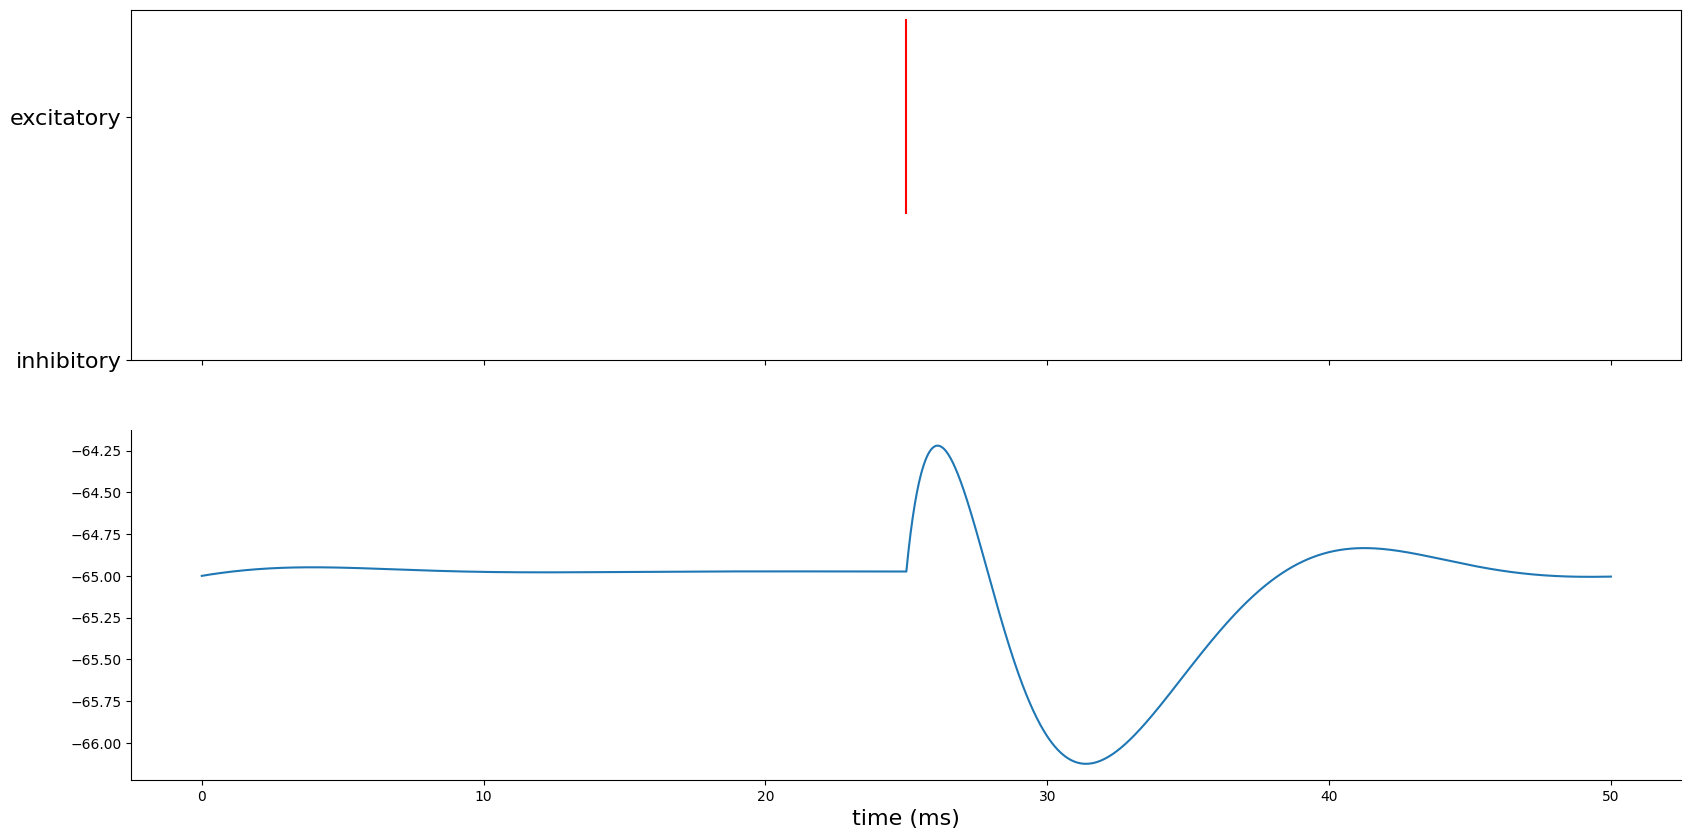

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(20,10), sharex=True)

axes[0].vlines(single_input_test_stimulus, .1, .9, color='red')
#axes[0].vlines(i_times, -.9, -.1, color='blue')
axes[0].set_yticks([.5,-.5])
axes[0].set_yticklabels(['excitatory','inhibitory'], fontsize=16)

axes[1].plot(base_hh_single_input_test._t, base_hh_single_input_test._v)

axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
    
axes[-1].set_xlabel('time (ms)', fontsize=16)

plt.show()